In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Input
from keras import optimizers, regularizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn import preprocessing
sns.set_style("whitegrid")

np.random.seed(697)

#Import data

In [20]:
#Import data
df = pd.read_csv('./dataset.csv')

In [21]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [22]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [24]:
#---------------------------------Pre-processing--------------------------------
#Check for missing values
df.isnull().sum() #No missing values thus no imputations needed

#Drop unneeded variables
df = df.drop(['ID'], axis = 1)

#Encode categorical variables to ONE-HOT
print('Converting categorical variables to numeric...')

categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

df = pd.get_dummies(df, columns = categorical_columns)

#Scale variables to [0,1] range
columns_to_scale = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'
    , 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df[columns_to_scale]=df[columns_to_scale].apply(lambda x: (x-x.min())/(x.max()-x.min()))

#Split in 75% train and 25% test set
train, test_df = train_test_split(df, test_size = 0.15, random_state= 1984)
train_df, dev_df = train_test_split(train, test_size = 0.15, random_state= 1984)

# Check distribution of labels in train and test set
train_df.Default.sum()/train_df.shape[0] #0.2210
dev_df.Default.sum()/dev_df.shape[0] #0.2269
test_df.Default.sum()/test_df.shape[0] #0.2168

# Define the final train and test sets
train_y = train_df.Default
dev_y = dev_df.Default
test_y = test_df.Default

train_x = train_df.drop(['Default'], axis = 1)
dev_x = dev_df.drop(['Default'], axis = 1)
test_x = test_df.drop(['Default'], axis = 1)

train_x =np.array(train_x)
dev_x =np.array(dev_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
dev_y = np.array(dev_y)
test_y = np.array(test_y)

Converting categorical variables to numeric...


Epoch 1/50
85/85 [==============================] - 2s 10ms/step - loss: 0.5467 - val_loss: 0.3532
Epoch 2/50
85/85 [==============================] - 1s 7ms/step - loss: 0.2800 - val_loss: 0.2424
Epoch 3/50
85/85 [==============================] - 0s 5ms/step - loss: 0.2283 - val_loss: 0.2149
Epoch 4/50
85/85 [==============================] - 0s 4ms/step - loss: 0.2024 - val_loss: 0.1890
Epoch 5/50
85/85 [==============================] - 0s 4ms/step - loss: 0.1769 - val_loss: 0.1657
Epoch 6/50
85/85 [==============================] - 0s 5ms/step - loss: 0.1570 - val_loss: 0.1496
Epoch 7/50
85/85 [==============================] - 0s 5ms/step - loss: 0.1436 - val_loss: 0.1384
Epoch 8/50
85/85 [==============================] - 0s 5ms/step - loss: 0.1335 - val_loss: 0.1292
Epoch 9/50
85/85 [==============================] - 0s 5ms/step - loss: 0.1246 - val_loss: 0.1205
Epoch 10/50
85/85 [==============================] - 0s 5ms/step - loss: 0.1160 - val_loss: 0.1119
Epoch 11/50
85/85 

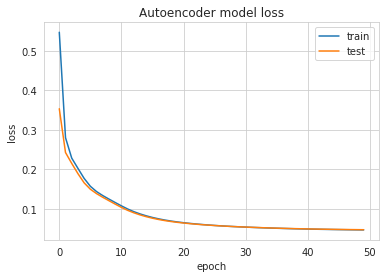

141/141 [==============================] - 0s 854us/step


In [25]:
#------------------------------------Build the AutoEncoder------------------------------------

# Choose size of our encoded representations (we will reduce our initial features to this number)
encoding_dim = 16

# Define input layer
input_data = Input(shape=(train_x.shape[1],))
# Define encoding layer
encoded = Dense(encoding_dim, activation='elu')(input_data)
# Define decoding layer
decoded = Dense(train_x.shape[1], activation='sigmoid')(encoded)
# Create the autoencoder model
autoencoder = Model(input_data, decoded)
#Compile the autoencoder model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')
#Fit to train set, validate with dev set and save to hist_auto for plotting purposes
hist_auto = autoencoder.fit(train_x, train_x,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(dev_x, dev_x))

# Summarize history for loss
plt.figure()
plt.plot(hist_auto.history['loss'])
plt.plot(hist_auto.history['val_loss'])
plt.title('Autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
encoder = Model(input_data, encoded)

# Create a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Encode and decode our test set (compare them vizually just to get a first insight of the autoencoder's performance)
encoded_x = encoder.predict(test_x)
decoded_output = decoder.predict(encoded_x)


141/141 [==============================] - 0s 769us/step
Epoch 1/10
271/271 [==============================] - 1s 2ms/step - loss: 0.4673 - val_loss: 0.4492
Epoch 2/10
271/271 [==============================] - 0s 1ms/step - loss: 0.4489 - val_loss: 0.4455
Epoch 3/10
271/271 [==============================] - 0s 1ms/step - loss: 0.4453 - val_loss: 0.4463
Epoch 4/10
271/271 [==============================] - 0s 1ms/step - loss: 0.4435 - val_loss: 0.4469
Epoch 5/10
271/271 [==============================] - 0s 1ms/step - loss: 0.4444 - val_loss: 0.4512
Epoch 6/10
271/271 [==============================] - 0s 1ms/step - loss: 0.4412 - val_loss: 0.4449
Epoch 7/10
271/271 [==============================] - 0s 1ms/step - loss: 0.4409 - val_loss: 0.4458
Epoch 8/10
271/271 [==============================] - 0s 1ms/step - loss: 0.4403 - val_loss: 0.4447
Epoch 9/10
271/271 [==============================] - 0s 1ms/step - loss: 0.4393 - val_loss: 0.4470
Epoch 10/10
271/271 [======================

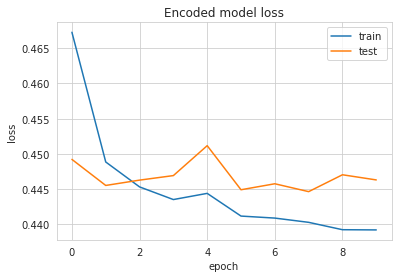

In [26]:
#--------------------------------Build new model using encoded data--------------------------
#Encode data set from above using the encoder
encoded_train_x = encoder.predict(train_x)
encoded_test_x = encoder.predict(test_x)

model = Sequential()
model.add(Dense(16, input_dim=encoded_train_x.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(0.02),
                activation="relu"
                )
          )
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')

history = model.fit(encoded_train_x, train_y, validation_split=0.2, epochs=10, batch_size=64)

# Summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Encoded model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


141/141 [==============================] - 0s 709us/step
Overall accuracy of Neural Network model: 0.822


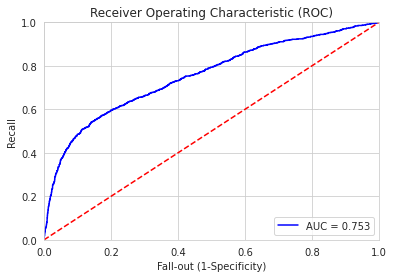

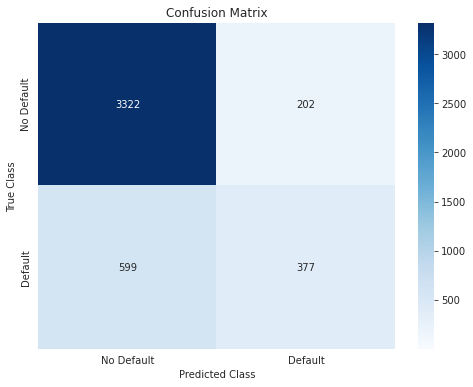

In [27]:
#---------------------------------Predictions and visuallizations-----------------------
#Predict on test set
predictions_NN_prob = model.predict(encoded_test_x)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

#Print accuracy
acc_NN = accuracy_score(test_y, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

#Print Confusion Matrix
cm = confusion_matrix(test_y, predictions_NN_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

